In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
data=pd.read_csv('salaries.csv')
data

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [3]:
le=LabelEncoder()

In [6]:
data["company"]=le.fit_transform(data.company) 
data["job"]=le.fit_transform(data.job)
data["degree"]=le.fit_transform(data.degree) 

In [7]:
data

,company,job,degree,salary_more_then_100k,company_1
0,2,2,0,0,2
1,2,2,1,0,2
2,2,0,0,1,2
3,2,0,1,1,2
4,2,1,0,0,2
5,2,1,1,1,2
6,0,2,1,0,0
7,0,1,0,0,0
8,0,0,0,0,0
9,0,0,1,1,0


In [8]:
x=data.drop(['company', 'salary_more_then_100k'],axis='columns')
y=data.salary_more_then_100k

In [9]:
x

,job,degree,company_1
0,2,0,2
1,2,1,2
2,0,0,2
3,0,1,2
4,1,0,2
5,1,1,2
6,2,1,0
7,1,0,0
8,0,0,0
9,0,1,0


In [10]:
des=tree.DecisionTreeClassifier()
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
des.fit(x_train,y_train)
y_pred = des.predict(x_test)

In [11]:
x_test

,job,degree,company_1
13,0,1,1
1,2,1,2
3,0,1,2
0,2,0,2


In [12]:
y_test

13    1
1     0
3     1
0     0
Name: salary_more_then_100k, dtype: int64

In [13]:
score = accuracy_score(y_test,y_pred)
score

0.75

In [14]:
con=confusion_matrix(y_test,y_pred)
con

array([[1, 1],
       [0, 2]], dtype=int64)

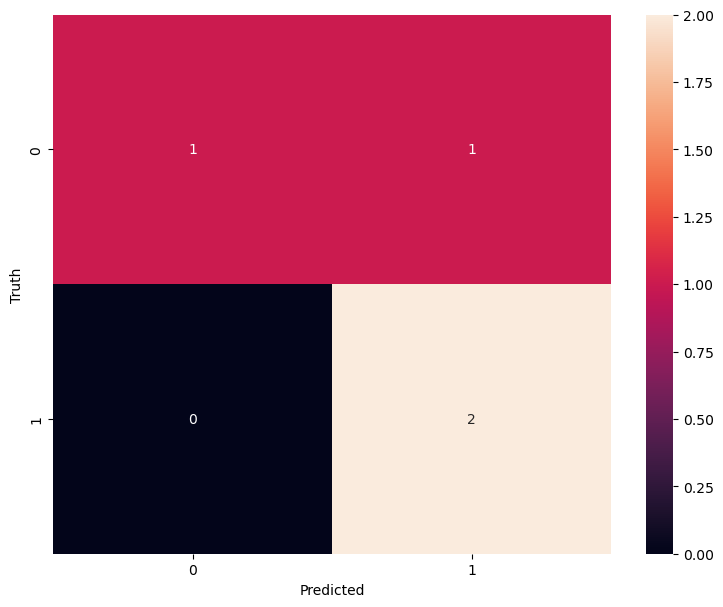

In [15]:
plt.figure(figsize=(9,7))
sn.heatmap(con,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()